In [2]:
import requests
import numpy as np
import pandas as pd

import time

from tqdm import tqdm
from tqdm import trange

# Python requests 모듈 간단 정리

[링크](https://dgkim5360.tistory.com/entry/python-requests)

## 닉네임 검색을 통한 소환사 정보 수집

[SUMMONER-V4](https://developer.riotgames.com/apis#summoner-v4/GET_getBySummonerName)

In [206]:
api_key = 'RGAPI-bb798e29-c61b-49ea-8538-47bb718bfe13'
sohwan_name = 'hide on bush'
sohwan_url = "https://kr.api.riotgames.com/lol/summoner/v4/summoners/by-name/" + sohwan_name +'?api_key=' + api_key
r = requests.get(sohwan_url)
r.json()

{'id': 'GhTnDczs_IOfKYRUzewMYENDmMUl-juHcFKm_-_DmrI6Xw',
 'accountId': 'K59HVC2gAaHAV6XA9KgRHeMNGLuBtc4IcfETyFv7WQcY',
 'puuid': '_l5tKa1wQti3rtCkY3TMebtMNB1OmjpwCMtYdX9AgCp3jxyIlRNt-aOgWA_O-3cwTWe5RQtOH47ASQ',
 'name': 'Hide on bush',
 'profileIconId': 6,
 'revisionDate': 1599475096000,
 'summonerLevel': 347}

## 소환사 랭크 정보 수집

[LEAGUE-V4](https://developer.riotgames.com/apis#league-v4/GET_getLeagueEntriesForSummoner)

In [19]:
tier_url = 'https://kr.api.riotgames.com/lol/league/v4/entries/by-summoner/' + r.json()['id'] +'?api_key=' + api_key
r2  = requests.get(tier_url)
r2.json()

[{'leagueId': '461c35cf-13a7-3e52-b83b-ae9721ed77c8',
  'queueType': 'RANKED_SOLO_5x5',
  'tier': 'GRANDMASTER',
  'rank': 'I',
  'summonerId': 'GhTnDczs_IOfKYRUzewMYENDmMUl-juHcFKm_-_DmrI6Xw',
  'summonerName': 'Hide on bush',
  'leaguePoints': 587,
  'wins': 493,
  'losses': 467,
  'veteran': False,
  'inactive': False,
  'freshBlood': False,
  'hotStreak': False}]

## 소환사 매치 정보 수집

[MATCH-V4](https://developer.riotgames.com/apis#match-v4/GET_getMatchlist)


In [21]:
match_url = 'https://kr.api.riotgames.com/lol/match/v4/matchlists/by-account/' + r.json()['accountId'] +'?api_key=' + api_key
r3 = requests.get(match_url)
r3.json()

{'matches': [{'platformId': 'KR',
   'gameId': 4631234474,
   'champion': 39,
   'queue': 420,
   'season': 13,
   'timestamp': 1599498795621,
   'role': 'DUO',
   'lane': 'TOP'},
  {'platformId': 'KR',
   'gameId': 4631270751,
   'champion': 164,
   'queue': 420,
   'season': 13,
   'timestamp': 1599496765031,
   'role': 'DUO_SUPPORT',
   'lane': 'NONE'},
  {'platformId': 'KR',
   'gameId': 4631136276,
   'champion': 164,
   'queue': 420,
   'season': 13,
   'timestamp': 1599494505008,
   'role': 'SOLO',
   'lane': 'MID'},
  {'platformId': 'KR',
   'gameId': 4631140726,
   'champion': 236,
   'queue': 420,
   'season': 13,
   'timestamp': 1599492347158,
   'role': 'DUO',
   'lane': 'MID'},
  {'platformId': 'KR',
   'gameId': 4631063920,
   'champion': 236,
   'queue': 420,
   'season': 13,
   'timestamp': 1599490086594,
   'role': 'DUO',
   'lane': 'MID'},
  {'platformId': 'KR',
   'gameId': 4630426538,
   'champion': 876,
   'queue': 420,
   'season': 13,
   'timestamp': 159947480489

In [59]:
r3.json()['matches']

[{'platformId': 'KR',
  'gameId': 4631234474,
  'champion': 39,
  'queue': 420,
  'season': 13,
  'timestamp': 1599498795621,
  'role': 'DUO',
  'lane': 'TOP'},
 {'platformId': 'KR',
  'gameId': 4631270751,
  'champion': 164,
  'queue': 420,
  'season': 13,
  'timestamp': 1599496765031,
  'role': 'DUO_SUPPORT',
  'lane': 'NONE'},
 {'platformId': 'KR',
  'gameId': 4631136276,
  'champion': 164,
  'queue': 420,
  'season': 13,
  'timestamp': 1599494505008,
  'role': 'SOLO',
  'lane': 'MID'},
 {'platformId': 'KR',
  'gameId': 4631140726,
  'champion': 236,
  'queue': 420,
  'season': 13,
  'timestamp': 1599492347158,
  'role': 'DUO',
  'lane': 'MID'},
 {'platformId': 'KR',
  'gameId': 4631063920,
  'champion': 236,
  'queue': 420,
  'season': 13,
  'timestamp': 1599490086594,
  'role': 'DUO',
  'lane': 'MID'},
 {'platformId': 'KR',
  'gameId': 4630426538,
  'champion': 876,
  'queue': 420,
  'season': 13,
  'timestamp': 1599474804894,
  'role': 'NONE',
  'lane': 'JUNGLE'},
 {'platformId':

In [60]:
m_url = match_url = 'https://kr.api.riotgames.com/lol/match/v4/matches/' + '4592852837' +'?api_key=' + api_key
rt = requests.get(m_url)
rt.json()

{'gameId': 4592852837,
 'platformId': 'KR',
 'gameCreation': 1598028327028,
 'gameDuration': 1466,
 'queueId': 420,
 'mapId': 11,
 'seasonId': 13,
 'gameVersion': '10.16.330.9186',
 'gameMode': 'CLASSIC',
 'gameType': 'MATCHED_GAME',
 'teams': [{'teamId': 100,
   'win': 'Win',
   'firstBlood': False,
   'firstTower': True,
   'firstInhibitor': True,
   'firstBaron': False,
   'firstDragon': True,
   'firstRiftHerald': False,
   'towerKills': 7,
   'inhibitorKills': 1,
   'baronKills': 0,
   'dragonKills': 2,
   'vilemawKills': 0,
   'riftHeraldKills': 1,
   'dominionVictoryScore': 0,
   'bans': [{'championId': 51, 'pickTurn': 1},
    {'championId': 84, 'pickTurn': 2},
    {'championId': 777, 'pickTurn': 3},
    {'championId': -1, 'pickTurn': 4},
    {'championId': 875, 'pickTurn': 5}]},
  {'teamId': 200,
   'win': 'Fail',
   'firstBlood': True,
   'firstTower': False,
   'firstInhibitor': False,
   'firstBaron': True,
   'firstDragon': False,
   'firstRiftHerald': True,
   'towerKills'

In [61]:
games = dict()

In [ ]:
# games update
for match in r3.json()['matches']:
    m_url = match_url = 'https://kr.api.riotgames.com/lol/match/v4/matches/' + '4592852837' +'?api_key=' + api_key
    rt = requests.get(m_url)
    rt.json()

In [62]:
games['4592852837'] = rt.json()

In [ ]:
games[key] = key값에 해당하는 match json

In [64]:
games['4592852837']

{'gameId': 4592852837,
 'platformId': 'KR',
 'gameCreation': 1598028327028,
 'gameDuration': 1466,
 'queueId': 420,
 'mapId': 11,
 'seasonId': 13,
 'gameVersion': '10.16.330.9186',
 'gameMode': 'CLASSIC',
 'gameType': 'MATCHED_GAME',
 'teams': [{'teamId': 100,
   'win': 'Win',
   'firstBlood': False,
   'firstTower': True,
   'firstInhibitor': True,
   'firstBaron': False,
   'firstDragon': True,
   'firstRiftHerald': False,
   'towerKills': 7,
   'inhibitorKills': 1,
   'baronKills': 0,
   'dragonKills': 2,
   'vilemawKills': 0,
   'riftHeraldKills': 1,
   'dominionVictoryScore': 0,
   'bans': [{'championId': 51, 'pickTurn': 1},
    {'championId': 84, 'pickTurn': 2},
    {'championId': 777, 'pickTurn': 3},
    {'championId': -1, 'pickTurn': 4},
    {'championId': 875, 'pickTurn': 5}]},
  {'teamId': 200,
   'win': 'Fail',
   'firstBlood': True,
   'firstTower': False,
   'firstInhibitor': False,
   'firstBaron': True,
   'firstDragon': False,
   'firstRiftHerald': True,
   'towerKills'

## 챔피언 기본 데이터프레임
[]

In [76]:
champ_url = 'http://ddragon.leagueoflegends.com/cdn/10.16.1/data/en_US/champion.json'
champ = requests.get(champ_url)
champ.json()

{'type': 'champion',
 'format': 'standAloneComplex',
 'version': '10.16.1',
 'data': {'Aatrox': {'version': '10.16.1',
   'id': 'Aatrox',
   'key': '266',
   'name': 'Aatrox',
   'title': 'the Darkin Blade',
   'blurb': 'Once honored defenders of Shurima against the Void, Aatrox and his brethren would eventually become an even greater threat to Runeterra, and were defeated only by cunning mortal sorcery. But after centuries of imprisonment, Aatrox was the first to find...',
   'info': {'attack': 8, 'defense': 4, 'magic': 3, 'difficulty': 4},
   'image': {'full': 'Aatrox.png',
    'sprite': 'champion0.png',
    'group': 'champion',
    'x': 0,
    'y': 0,
    'w': 48,
    'h': 48},
   'tags': ['Fighter', 'Tank'],
   'partype': 'Blood Well',
   'stats': {'hp': 580,
    'hpperlevel': 90,
    'mp': 0,
    'mpperlevel': 0,
    'movespeed': 345,
    'armor': 38,
    'armorperlevel': 3.25,
    'spellblock': 32.1,
    'spellblockperlevel': 1.25,
    'attackrange': 175,
    'hpregen': 3,
    'h

In [77]:
champ.json()['data']

{'Aatrox': {'version': '10.16.1',
  'id': 'Aatrox',
  'key': '266',
  'name': 'Aatrox',
  'title': 'the Darkin Blade',
  'blurb': 'Once honored defenders of Shurima against the Void, Aatrox and his brethren would eventually become an even greater threat to Runeterra, and were defeated only by cunning mortal sorcery. But after centuries of imprisonment, Aatrox was the first to find...',
  'info': {'attack': 8, 'defense': 4, 'magic': 3, 'difficulty': 4},
  'image': {'full': 'Aatrox.png',
   'sprite': 'champion0.png',
   'group': 'champion',
   'x': 0,
   'y': 0,
   'w': 48,
   'h': 48},
  'tags': ['Fighter', 'Tank'],
  'partype': 'Blood Well',
  'stats': {'hp': 580,
   'hpperlevel': 90,
   'mp': 0,
   'mpperlevel': 0,
   'movespeed': 345,
   'armor': 38,
   'armorperlevel': 3.25,
   'spellblock': 32.1,
   'spellblockperlevel': 1.25,
   'attackrange': 175,
   'hpregen': 3,
   'hpregenperlevel': 1,
   'mpregen': 0,
   'mpregenperlevel': 0,
   'crit': 0,
   'critperlevel': 0,
   'attackdama

In [117]:
champ_dict = dict()

champ_key_column = list()

for champname in champ.json()['data']:
    champ_dict[champ.json()['data'][champname]['key']] = champ_dict.get(champ.json()['data'][champname]['key'],[])
    champ_key_column.append(champ.json()['data'][champname]['key'])

In [113]:
champ_dict

{'266': [],
 '103': [],
 '84': [],
 '12': [],
 '32': [],
 '34': [],
 '1': [],
 '523': [],
 '22': [],
 '136': [],
 '268': [],
 '432': [],
 '53': [],
 '63': [],
 '201': [],
 '51': [],
 '164': [],
 '69': [],
 '31': [],
 '42': [],
 '122': [],
 '131': [],
 '119': [],
 '36': [],
 '245': [],
 '60': [],
 '28': [],
 '81': [],
 '9': [],
 '114': [],
 '105': [],
 '3': [],
 '41': [],
 '86': [],
 '150': [],
 '79': [],
 '104': [],
 '120': [],
 '74': [],
 '420': [],
 '39': [],
 '427': [],
 '40': [],
 '59': [],
 '24': [],
 '126': [],
 '202': [],
 '222': [],
 '145': [],
 '429': [],
 '43': [],
 '30': [],
 '38': [],
 '55': [],
 '10': [],
 '141': [],
 '85': [],
 '121': [],
 '203': [],
 '240': [],
 '96': [],
 '7': [],
 '64': [],
 '89': [],
 '876': [],
 '127': [],
 '236': [],
 '117': [],
 '99': [],
 '54': [],
 '90': [],
 '57': [],
 '11': [],
 '21': [],
 '62': [],
 '82': [],
 '25': [],
 '267': [],
 '75': [],
 '111': [],
 '518': [],
 '76': [],
 '56': [],
 '20': [],
 '2': [],
 '61': [],
 '516': [],
 '80': [],
 

In [118]:
#champ_key_column=tuple(champ_key_column)
len(champ_key_column)
champ_key_column

['266',
 '103',
 '84',
 '12',
 '32',
 '34',
 '1',
 '523',
 '22',
 '136',
 '268',
 '432',
 '53',
 '63',
 '201',
 '51',
 '164',
 '69',
 '31',
 '42',
 '122',
 '131',
 '119',
 '36',
 '245',
 '60',
 '28',
 '81',
 '9',
 '114',
 '105',
 '3',
 '41',
 '86',
 '150',
 '79',
 '104',
 '120',
 '74',
 '420',
 '39',
 '427',
 '40',
 '59',
 '24',
 '126',
 '202',
 '222',
 '145',
 '429',
 '43',
 '30',
 '38',
 '55',
 '10',
 '141',
 '85',
 '121',
 '203',
 '240',
 '96',
 '7',
 '64',
 '89',
 '876',
 '127',
 '236',
 '117',
 '99',
 '54',
 '90',
 '57',
 '11',
 '21',
 '62',
 '82',
 '25',
 '267',
 '75',
 '111',
 '518',
 '76',
 '56',
 '20',
 '2',
 '61',
 '516',
 '80',
 '78',
 '555',
 '246',
 '133',
 '497',
 '33',
 '421',
 '58',
 '107',
 '92',
 '68',
 '13',
 '113',
 '235',
 '875',
 '35',
 '98',
 '102',
 '27',
 '14',
 '15',
 '72',
 '37',
 '16',
 '50',
 '517',
 '134',
 '223',
 '163',
 '91',
 '44',
 '17',
 '412',
 '18',
 '48',
 '23',
 '4',
 '29',
 '77',
 '6',
 '110',
 '67',
 '45',
 '161',
 '254',
 '112',
 '8',
 '106',


## 소환사 - 챔피언 플레이 기록 행렬 생성

### matrix 를 만든후에 column, index(row) 전부 naming한 뒤에 df로 바꿀지
### index(row) 추가하는것 고려해서 

In [29]:
r3.json()['matches'][0]

{'platformId': 'KR',
 'gameId': 4631234474,
 'champion': 39,
 'queue': 420,
 'season': 13,
 'timestamp': 1599498795621,
 'role': 'DUO',
 'lane': 'TOP'}

In [115]:
sohwan_champion_df = pd.DataFrame(data=champ_dict)

In [116]:
sohwan_champion_df

,266,103,84,12,32,34,1,523,22,136,...,157,777,83,350,154,238,115,26,142,143


In [45]:
for match in r3.json()['matches']:
    champ_dict[match['champion']] = champ_dict.get(match['champion'],0)+1

In [56]:
champ_dict

{39: 6,
 164: 2,
 236: 16,
 876: 5,
 517: 7,
 85: 1,
 53: 2,
 58: 1,
 69: 1,
 421: 1,
 429: 3,
 84: 10,
 875: 3,
 61: 2,
 98: 1,
 3: 6,
 80: 2,
 126: 3,
 5: 1,
 10: 1,
 142: 7,
 38: 1,
 223: 1,
 134: 2,
 238: 4,
 245: 1,
 62: 2,
 81: 1,
 8: 1,
 268: 1,
 99: 1,
 20: 1,
 777: 2,
 9: 1}

### 최상위 플레이어(챌린저,그랜드마스터,마스터)

[LEAGUE-V4](https://developer.riotgames.com/apis#league-v4/GET_getChallengerLeague)

summonerId로는 전적검색이 안됨
summonerName로 account 검색 후 전적검색 해야 함

In [122]:
challenger_url = 'https://kr.api.riotgames.com/lol/league/v4/challengerleagues/by-queue/RANKED_SOLO_5x5'+'?api_key=' + api_key
challenger_league = requests.get(challenger_url)
challenger_league.json()

{'tier': 'CHALLENGER',
 'leagueId': '5cc4fe58-4e57-37f1-9dc3-7c32b2632923',
 'queue': 'RANKED_SOLO_5x5',
 'name': "Hecarim's Snipers",
 'entries': [{'summonerId': 'm2c14zFzDpsiXpznalgEL_GI--qk1uwG07L2vaUoesuE_To',
   'summonerName': 'DRX Deft',
   'leaguePoints': 1030,
   'rank': 'I',
   'wins': 584,
   'losses': 514,
   'veteran': True,
   'inactive': False,
   'freshBlood': False,
   'hotStreak': False},
  {'summonerId': '7PehlH62UmRvzVrz7zU6TziUzLB9FQ6Jd74McqL2VgpCl-8',
   'summonerName': 'guchengzz',
   'leaguePoints': 701,
   'rank': 'I',
   'wins': 574,
   'losses': 424,
   'veteran': True,
   'inactive': False,
   'freshBlood': False,
   'hotStreak': False},
  {'summonerId': 't6pFlGbJhMnbcEAmP-9g15CTeDV0txw8YCRqhd38AAfHkms',
   'summonerName': 'DWG ShowMaker',
   'leaguePoints': 1579,
   'rank': 'I',
   'wins': 332,
   'losses': 239,
   'veteran': True,
   'inactive': False,
   'freshBlood': False,
   'hotStreak': False},
  {'summonerId': 'FvqOvVlUWgrcnKjdTifOc8ZbxMVo3VmikAQe2fV

In [131]:
challenger_sohwan = list()
for entries in challenger_league.json()['entries']:
    challenger_sohwan.append(entries['summonerName'])
challenger_sohwan

['DRX Deft',
 'guchengzz',
 'DWG ShowMaker',
 'KzcXaz',
 '승부욕xxx',
 'SANDBOX To1anD',
 '소년가장 원딜',
 'Awe YunWAY',
 'Pnpm',
 '미친듯이 파이팅',
 'KT Ucal',
 'krats aira',
 'K CHEN 12',
 'HSHTM',
 'SANDBOX Route',
 'hy 20944947',
 '파이팅 인생',
 '준탱이528',
 'tuinoobtuixinloi',
 'KTA SUP',
 'IIIllIllIIIIIl',
 '개똥벌레a',
 'DFM GAENG',
 'Gen G Peyz',
 'Teddy12345',
 'lai dian gou yun',
 'xiaopihaiz',
 '추억에잠긴거북이',
 '메가 우기',
 'mla',
 '악어새',
 'Aprox',
 'xunxunxun',
 'Tar2an',
 '미쳐놈',
 '조금만쉬다올게요',
 '정훈이의 모험',
 '모두가 건강하길',
 'iilliliiillllii',
 '이도류',
 'Mango Fish',
 '디알엑스 쿼드',
 'SyIvie',
 'FPXzhaoZD4506303',
 '피곤 해 요1',
 '아카루이',
 'jiang wei da ji',
 'HLE Vsta',
 'JUGKlNG',
 'nnvbxz3324',
 'gelaoguan',
 'deokdam',
 '카게게',
 '직스 좀 믿어줘',
 'SANDBOX Leo',
 'T1 Roamer',
 '돼지다람쥐북극곰',
 '버기해적단 버기',
 'KonoDioDaa',
 'ZED99',
 'hulabibo',
 'Babe G',
 'H4rp',
 '너 왜 우럭',
 'showmakerzzz',
 'pleatazz',
 '탑 혜지',
 'LunaLina',
 'KZ Quad',
 'yutazz',
 'EM Envy',
 '이 차가 식기전에',
 '베어 쓰러뜨리다',
 'SANDBOX Ice',
 'Single beltk',
 'T1 Burd

In [132]:
grandmaster_url = 'https://kr.api.riotgames.com/lol/league/v4/grandmasterleagues/by-queue/RANKED_SOLO_5x5'+'?api_key=' + api_key
grandmaster_league = requests.get(grandmaster_url)
grandmaster_league.json()
grandmaster_sohwan = list()
for entries in grandmaster_league.json()['entries']:
    grandmaster_sohwan.append(entries['summonerName'])
grandmaster_sohwan

['정대구',
 'Heart',
 '마타아시타',
 'beixinjie',
 '내고추를보았는가',
 'qiaqia',
 '권  예  솔',
 'KTA Top',
 'GLPFBN',
 'hewon',
 'San xun 20',
 '나쁜코로나',
 'dolcasa',
 'CCrazy',
 'eren헌터',
 'TESzhao51459968',
 'Kill the Baron',
 '유리Yur1',
 'capturial',
 '김동혁의골목식당',
 'yygnb',
 'Puff KR',
 'Qianshui siwang',
 'Korek1yo',
 'feelogic',
 'gogotoptop',
 '닥터 스트레인지',
 '가슴에 살아',
 'Verit4s',
 'lliilillilililll',
 'Gen G 무',
 '오빠의바나나',
 'Nisimiya Shouko',
 '17xxx',
 'gofushisharenji',
 '1등마',
 'Jisu3',
 'Shadow Nia',
 'ig nugur1',
 'chixiaoyubaby',
 'Lehends',
 'yinyi zai ma ren',
 '레옹1',
 'CitrusReticulata',
 '상태 메시지 없음',
 'Wangmengting',
 '오리지널찰떡쿠키',
 'nsmarin',
 '19 9 24 21',
 '학일계군',
 'HUYATV WooJu',
 '돌카사',
 'FA  Mockery',
 'SANDBOX FATE',
 'Kamabunta',
 'HUYATV Myeong In',
 'EC1996',
 'XIVA',
 'DY Shi Yue ',
 '베인장인요맨',
 'NNGG',
 '돼지파인애플',
 'Fox B Challss',
 '트위치김수당',
 '가디와놀자',
 '빵속에 초코우유',
 'TnToT',
 'Sry Sup Gap ToT',
 '아이번맨2',
 '집사님잘좀해봐요',
 'Shadow Swamp',
 'Kim Sang Hoon',
 '아라가키 유이',
 'Naehyun',
 '다뿌싸삔다',

In [133]:
master_url = 'https://kr.api.riotgames.com/lol/league/v4/masterleagues/by-queue/RANKED_SOLO_5x5'+'?api_key=' + api_key
master_league = requests.get(grandmaster_url)
master_league.json()
master_sohwan = list()
for entries in master_league.json()['entries']:
    master_sohwan.append(entries['summonerName'])
master_sohwan

['ShrimpVicious',
 '03 Teddy',
 '김구거',
 '쇼 매',
 'dan sa fake2',
 'he fei tai xiao',
 'sorsorry',
 '쥐새끼는찍찍찍',
 'Tangwa',
 'Yaw nuY',
 'Mocha',
 'Lehends defensi',
 'QyO',
 '돌아온왕비',
 'TES  QingXun',
 '려창동',
 'Gyeon100',
 'ELaB Unisia',
 'LOVE GD',
 'Godjuan',
 'IIllllIIIIIllII',
 '자메이카흑인',
 'xiaomochuji',
 '주사위같은사람',
 'Onikiri',
 'kebukeyi',
 '탑 팁',
 'EawqaaAOVO',
 'PhasedKiller',
 '코코오빠 o',
 'SADKING',
 '손연우 남자친구',
 'baibaishizhu',
 'Ar1a',
 'happy farm',
 '이기게해주세요',
 '징징이는징징징징',
 'ca1hongdao',
 '윤소공원',
 '쉔글벙글',
 'mg1222',
 'Ucal',
 'deng wo lv16',
 '쿠샬디오라',
 'T1 SailorMoon',
 '울부짖는마오카이',
 'nan yi hu xi',
 'KT Ray',
 'Excuse',
 '크세로',
 'hate spring',
 '갱슥2',
 'DWG Nuclear',
 'Gen G Felix',
 'R4eZ2z',
 'UDT707',
 '펩시가콜라냐',
 '자신에게만관대함',
 'JongSeop Eun',
 'Summerends',
 '김장해 엄청나',
 '커피물조절장인',
 '950502',
 'Kiss Me Plz',
 'Fox B Lord',
 'Alwayssss',
 '봉골레파스타사줘',
 'still in dream',
 '잠만보미',
 '참포도나무',
 '무릉도원10층까지',
 'Burrning',
 'get0n',
 'kaidakaidakaida',
 '너보단 간절해',
 '그땐 그저 좋았다',
 'Fotune',

In [130]:
print(len(challenger_sohwan))
print(len(grandmaster_sohwan))
print(len(master_sohwan))

300
700
700


## 소환사명에 매칭되는 accountId 구하기

In [199]:
challenger_id=list()
grandmaster_id=list()
master_id=list()

In [208]:
for i in tqdm(range(len(challenger_sohwan))):
    try:
        api_url = 'https://kr.api.riotgames.com/lol/summoner/v4/summoners/by-name/' + challenger_sohwan[i] + '?api_key=' + api_key 
        r = requests.get(api_url)
        
        if r.status_code == 200: # response가 정상이면 바로 맨 밑으로 이동하여 정상적으로 코드 실행
            pass

        elif r.status_code == 429:
            print('api cost full : infinite loop start')
            print('loop location : ',i)
            start_time = time.time()

            while True: # 429error가 끝날 때까지 무한 루프
                if r.status_code == 429:

                    print('try 10 second wait time')
                    time.sleep(10)

                    r = requests.get(api_url)
                    print(r.status_code)

                elif r.status_code == 200: #다시 response 200이면 loop escape
                    print('total wait time : ', time.time() - start_time)
                    print('recovery api cost')
                    break

        elif r.status_code == 503: # 잠시 서비스를 이용하지 못하는 에러
            print('service available error')
            start_time = time.time()

            while True:
                if r.status_code == 503 or r.status_code == 429:

                    print('try 10 second wait time')
                    time.sleep(10)

                    r = requests.get(api_url)
                    print(r.status_code)

                elif r.status_code == 200: # 똑같이 response가 정상이면 loop escape
                    print('total error wait time : ', time.time() - start_time)
                    print('recovery api cost')
                    break
        elif r.status_code == 403: # api갱신이 필요
            print('you need api renewal')
            print('break')
            break
        
        account_id = r.json()['accountId']
        challenger_id.append(account_id)
        
    except:
        pass

 24%|██▎       | 71/300 [00:15<00:48,  4.69it/s]

api cost full : infinite loop start
loop location :  71
try 10 second wait time
429
try 10 second wait time
429
try 10 second wait time
429
try 10 second wait time
429
try 10 second wait time
429
try 10 second wait time
429
try 10 second wait time
429
try 10 second wait time


 24%|██▍       | 72/300 [01:36<1:33:36, 24.64s/it]

200
total wait time :  81.45126914978027
recovery api cost


 57%|█████▋    | 171/300 [01:57<00:28,  4.56it/s] 

api cost full : infinite loop start
loop location :  171
try 10 second wait time
429
try 10 second wait time
429
try 10 second wait time
429
try 10 second wait time
429
try 10 second wait time
429
try 10 second wait time
429
try 10 second wait time
429
try 10 second wait time
429
try 10 second wait time
429
try 10 second wait time


 57%|█████▋    | 172/300 [03:39<1:05:36, 30.76s/it]

200
total wait time :  101.8377640247345
recovery api cost


 90%|█████████ | 271/300 [04:00<00:06,  4.77it/s]  

api cost full : infinite loop start
loop location :  271
try 10 second wait time
429
try 10 second wait time
429
try 10 second wait time
429
try 10 second wait time
429
try 10 second wait time
429
try 10 second wait time
429
try 10 second wait time
429
try 10 second wait time
429
try 10 second wait time
429
try 10 second wait time


 91%|█████████ | 272/300 [05:43<14:22, 30.79s/it]

200
total wait time :  101.9770815372467
recovery api cost


100%|██████████| 300/300 [05:49<00:00,  1.16s/it]


In [209]:
challenger_id

['3Vb2hVxr9HR4GwtbgLjlc0WxoyEGpoKqKBtUkTp-PSMC8ZM',
 'VYCm40_AcYJ-CKXfNxrDc4VnJaIQA57w7dkPfZ4IB6wAUA3YLxP8aOe7',
 'l6NiVR5Blg8joRNbS_Mhr09VT0ntYM1NLgBwg7LGKyYaPBg',
 'rRPamNmees5_rus1E7oe_j6oobltJn2kDO4U_AvGOXiABUHJHdmrUAvm',
 'tsYJMWXp_eyfoX5VqNsmN3X1tps87c2YbSZWGNVVjEYJZC3NW_Dm4prS',
 'iYEu4AaHtgOkoxKek3FWPbHb8R3VYSA4p0pInowXXvjTJVI',
 '87QP8WIECPnqFjzXWXRTfsdKB941U7f3bLDzdqxZyOYD0x39-V11n5Ko',
 '4X2D_SiNFJF4SmgnJAwx-H7ygVrIK3yMVTJjjvU7fQGZptc',
 'JtsDcMHam2zhtrH5LeVuiQuAdO99yZpSZZMmbD-y8FAU-OYFQEEobOsA',
 'SUnmJvdPtJ3xeeQAXFrWoehnb6YsMoWK4Dk5SHoL1nkrM2U',
 'TXB65BG4GoCYz06uMiALBfDR0LR-6Xmsz4Mi7RjttIJrqBQ',
 'XKPctdy1x5dz-3NoEpefhheeLlJB1G9VBWyAy1eIocVNH58',
 'etyV4HDPYirtA2Ae2TTZbJAmvoGnO0lvbUdjaN9alGqZNFmaxiwwOdW_',
 '_h5dQOGGDwhcCk69xv9w6V6W6sS8G6bexvMEP6gAX6ftXk4K_rMxDmAZ',
 '59xjuTjNun-nPZ71OgX8g-vhF3Hm3lYNBpfnGfcaE2oQrEg',
 'Xe3Sve7BF-pyuDGedivJtOwcGeuY4dbBXM5U6ckEXEFLWD5O5PWyFGjj',
 'om7K5u-Ut34q0PcQ6q3zSKZqU1GEW421ZaauUknFrLKky6mMTS48ocS3',
 'AOW_AwdnSxYTn8xKTx7cnPmTCDI4jlT9D

In [210]:
len(challenger_id)

299

## 매치id 수집

[MATCH-V4](https://developer.riotgames.com/apis#match-v4/GET_getMatchlist)

In [213]:
#13시즌의 데이터만을 이용할 것이며 league_df3 => 기존에 수집한 account_id가 있는 league_df
match_info_df = pd.DataFrame()

season = str(13)
for i in tqdm(range(len(challenger_id))):
    try:
        api_url = 'https://kr.api.riotgames.com/lol/match/v4/matchlists/by-account/' + challenger_id[i]  +'?season=' + season + '&api_key=' + api_key
        r = requests.get(api_url)
        
        if r.status_code == 200: # response가 정상이면 바로 맨 밑으로 이동하여 정상적으로 코드 실행
            pass

        elif r.status_code == 429:
            print('api cost full : infinite loop start')
            print('loop location : ',i)
            start_time = time.time()

            while True: # 429error가 끝날 때까지 무한 루프
                if r.status_code == 429:

                    print('try 10 second wait time')
                    time.sleep(10)

                    r = requests.get(api_url)
                    print(r.status_code)

                elif r.status_code == 200: #다시 response 200이면 loop escape
                    print('total wait time : ', time.time() - start_time)
                    print('recovery api cost')
                    break

        elif r.status_code == 503: # 잠시 서비스를 이용하지 못하는 에러
            print('service available error')
            start_time = time.time()

            while True:
                if r.status_code == 503 or r.status_code == 429:

                    print('try 10 second wait time')
                    time.sleep(10)

                    r = requests.get(api_url)
                    print(r.status_code)

                elif r.status_code == 200: # 똑같이 response가 정상이면 loop escape
                    print('total error wait time : ', time.time() - start_time)
                    print('recovery api cost')
                    break
        elif r.status_code == 403: # api갱신이 필요
            print('you need api renewal')
            print('break')
            break
            
        match_info_df = pd.concat([match_info_df, pd.DataFrame(r.json()['matches'])])
        
    except:
        print(i)

 19%|█▊        | 56/299 [00:17<01:15,  3.24it/s]

55


 33%|███▎      | 100/299 [00:31<01:02,  3.17it/s]

api cost full : infinite loop start
loop location :  100
try 10 second wait time
429
try 10 second wait time
429
try 10 second wait time
429
try 10 second wait time
429
try 10 second wait time
429
try 10 second wait time
429
try 10 second wait time
429
try 10 second wait time
429
try 10 second wait time


 34%|███▍      | 101/299 [02:03<1:31:44, 27.80s/it]

200
total wait time :  91.75565361976624
recovery api cost


 67%|██████▋   | 200/299 [02:36<00:35,  2.80it/s]  

api cost full : infinite loop start
loop location :  200
try 10 second wait time
429
try 10 second wait time
429
try 10 second wait time
429
try 10 second wait time
429
try 10 second wait time
429
try 10 second wait time
429
try 10 second wait time
429
try 10 second wait time
429
try 10 second wait time


 67%|██████▋   | 201/299 [04:08<45:28, 27.84s/it]

200
total wait time :  91.78620910644531
recovery api cost


100%|██████████| 299/299 [04:39<00:00,  1.07it/s]


In [214]:
match_info_df

,platformId,gameId,champion,queue,season,timestamp,role,lane
0,KR,4633492176,22,420,13,1599590086749,DUO_CARRY,BOTTOM
1,KR,4633388207,22,420,13,1599586510439,DUO_CARRY,BOTTOM
2,KR,4633423662,22,420,13,1599584005726,DUO_CARRY,BOTTOM
3,KR,4633307528,51,420,13,1599580943651,SOLO,BOTTOM
4,KR,4633312836,64,420,13,1599579048361,DUO_SUPPORT,NONE
...,...,...,...,...,...,...,...,...
95,KR,4601378149,24,420,13,1598378967344,SOLO,TOP
96,KR,4601394808,24,420,13,1598376675918,SOLO,TOP
97,KR,4601309181,24,420,13,1598373565957,SOLO,TOP
98,KR,4601284842,24,420,13,1598370886088,SOLO,TOP


In [215]:
# 중복제거
match_set = list(set(match_info_df['gameId']))
print(len(set(match_info_df['gameId'])))
print(len(list(match_info_df['gameId'])))

13895
29613


## 매치데이터(게임데이터) 수집

[MATCH-V4](https://developer.riotgames.com/apis#match-v4/GET_getMatch)

In [186]:
match_fin = pd.DataFrame()

In [207]:
for i in tqdm(range(len(match_set))):    
    
    api_url='https://kr.api.riotgames.com/lol/match/v4/matches/' + str(match_set[i]) + '?api_key=' + api_key
    r = requests.get(api_url)

    if r.status_code == 200: # response가 정상이면 바로 맨 밑으로 이동하여 정상적으로 코드 실행
        pass

    elif r.status_code == 429:
        print('api cost full : infinite loop start')
        print('loop location : ',i)
        start_time = time.time()

        while True: # 429error가 끝날 때까지 무한 루프
            if r.status_code == 429:

                print('try 10 second wait time')
                time.sleep(10)

                r = requests.get(api_url)
                print(r.status_code)

            elif r.status_code == 200: #다시 response 200이면 loop escape
                print('total wait time : ', time.time() - start_time)
                print('recovery api cost')
                break

    elif r.status_code == 503: # 잠시 서비스를 이용하지 못하는 에러
        print('service available error')
        start_time = time.time()

        while True:
            if r.status_code == 503 or r.status_code == 429:

                print('try 10 second wait time')
                time.sleep(10)

                r = requests.get(api_url)
                print(r.status_code)

            elif r.status_code == 200: # 똑같이 response가 정상이면 loop escape
                print('total error wait time : ', time.time() - start_time)
                print('recovery api cost')
                break
    elif r.status_code == 403: # api갱신이 필요
        print('you need api renewal')
        print('break')
        break

    # 위의 예외처리 코드를 거쳐서 내려왔을 때 해당 코드가 실행될 수 있도록 작성
    mat = pd.DataFrame(list(r.json().values()), index=list(r.json().keys())).T
    match_fin = pd.concat([match_fin,mat])

  0%|          | 26/6253 [00:08<34:39,  2.99it/s]


KeyboardInterrupt: 

In [226]:
match_fin

,gameId,platformId,gameCreation,gameDuration,queueId,mapId,seasonId,gameVersion,gameMode,gameType,teams,participants,participantIdentities,status
0,4607082498,KR,1598614604172,1327,420,11,13,10.16.330.9186,CLASSIC,MATCHED_GAME,"[{'teamId': 100, 'win': 'Fail', 'firstBlood': ...","[{'participantId': 1, 'teamId': 100, 'champion...","[{'participantId': 1, 'player': {'platformId':...",NaN
0,4536860675,KR,1595927443677,2106,420,11,13,10.15.328.8759,CLASSIC,MATCHED_GAME,"[{'teamId': 100, 'win': 'Win', 'firstBlood': F...","[{'participantId': 1, 'teamId': 100, 'champion...","[{'participantId': 1, 'player': {'platformId':...",NaN
0,4478861319,KR,1593442472883,1899,420,11,13,10.13.326.4870,CLASSIC,MATCHED_GAME,"[{'teamId': 100, 'win': 'Win', 'firstBlood': T...","[{'participantId': 1, 'teamId': 100, 'champion...","[{'participantId': 1, 'player': {'platformId':...",NaN
0,4530798600,KR,1595686706534,607,1300,21,13,10.15.328.8759,NEXUSBLITZ,MATCHED_GAME,"[{'teamId': 100, 'win': 'Fail', 'firstBlood': ...","[{'participantId': 1, 'teamId': 100, 'champion...","[{'participantId': 1, 'player': {'platformId':...",NaN
0,4467195917,KR,1592975909614,1420,420,11,13,10.13.325.7485,CLASSIC,MATCHED_GAME,"[{'teamId': 100, 'win': 'Win', 'firstBlood': T...","[{'participantId': 1, 'teamId': 100, 'champion...","[{'participantId': 1, 'player': {'platformId':...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,4603379817,KR,1598451295161,1589,420,11,13,10.16.330.9186,CLASSIC,MATCHED_GAME,"[{'teamId': 100, 'win': 'Win', 'firstBlood': T...","[{'participantId': 1, 'teamId': 100, 'champion...","[{'participantId': 1, 'player': {'platformId':...",NaN
0,4595122281,KR,1598107945657,1959,420,11,13,10.16.330.9186,CLASSIC,MATCHED_GAME,"[{'teamId': 100, 'win': 'Win', 'firstBlood': F...","[{'participantId': 1, 'teamId': 100, 'champion...","[{'participantId': 1, 'player': {'platformId':...",NaN
0,4600922217,KR,1598357768010,1358,420,11,13,10.16.330.9186,CLASSIC,MATCHED_GAME,"[{'teamId': 100, 'win': 'Fail', 'firstBlood': ...","[{'participantId': 1, 'teamId': 100, 'champion...","[{'participantId': 1, 'player': {'platformId':...",NaN
0,4617142380,KR,1598986178805,1760,420,11,13,10.16.330.9186,CLASSIC,MATCHED_GAME,"[{'teamId': 100, 'win': 'Win', 'firstBlood': F...","[{'participantId': 1, 'teamId': 100, 'champion...","[{'participantId': 1, 'player': {'platformId':...",NaN


In [225]:
match_fin.iloc[0]['teams']

[{'teamId': 100,
  'win': 'Fail',
  'firstBlood': True,
  'firstTower': False,
  'firstInhibitor': False,
  'firstBaron': False,
  'firstDragon': True,
  'firstRiftHerald': True,
  'towerKills': 1,
  'inhibitorKills': 0,
  'baronKills': 0,
  'dragonKills': 1,
  'vilemawKills': 0,
  'riftHeraldKills': 2,
  'dominionVictoryScore': 0,
  'bans': [{'championId': -1, 'pickTurn': 1},
   {'championId': 432, 'pickTurn': 2},
   {'championId': 80, 'pickTurn': 3},
   {'championId': 236, 'pickTurn': 4},
   {'championId': 246, 'pickTurn': 5}]},
 {'teamId': 200,
  'win': 'Win',
  'firstBlood': False,
  'firstTower': True,
  'firstInhibitor': False,
  'firstBaron': True,
  'firstDragon': False,
  'firstRiftHerald': False,
  'towerKills': 6,
  'inhibitorKills': 0,
  'baronKills': 1,
  'dragonKills': 1,
  'vilemawKills': 0,
  'riftHeraldKills': 0,
  'dominionVictoryScore': 0,
  'bans': [{'championId': 55, 'pickTurn': 6},
   {'championId': 236, 'pickTurn': 7},
   {'championId': 27, 'pickTurn': 8},
   {'c

In [227]:
match_fin.iloc[0]['participants']

[{'participantId': 1,
  'teamId': 100,
  'championId': 876,
  'spell1Id': 11,
  'spell2Id': 4,
  'stats': {'participantId': 1,
   'win': False,
   'item0': 1402,
   'item1': 3157,
   'item2': 2055,
   'item3': 3020,
   'item4': 1082,
   'item5': 1028,
   'item6': 3364,
   'kills': 5,
   'deaths': 5,
   'assists': 5,
   'largestKillingSpree': 2,
   'largestMultiKill': 1,
   'killingSprees': 1,
   'longestTimeSpentLiving': 335,
   'doubleKills': 0,
   'tripleKills': 0,
   'quadraKills': 0,
   'pentaKills': 0,
   'unrealKills': 0,
   'totalDamageDealt': 126732,
   'magicDamageDealt': 77298,
   'physicalDamageDealt': 14590,
   'trueDamageDealt': 34842,
   'largestCriticalStrike': 0,
   'totalDamageDealtToChampions': 9227,
   'magicDamageDealtToChampions': 6138,
   'physicalDamageDealtToChampions': 717,
   'trueDamageDealtToChampions': 2371,
   'totalHeal': 6617,
   'totalUnitsHealed': 1,
   'damageSelfMitigated': 9206,
   'damageDealtToObjectives': 24101,
   'damageDealtToTurrets': 0,
   '

In [193]:
import os

DATA_DIR = ""
DUMP_FILE = os.path.join(DATA_DIR, "match_fin.pkl")

def dump_dataframes(dataframes):
    pd.to_pickle(dataframes, DUMP_FILE)
    
dump_dataframes(match_fin)

## 설문 조사 결과

In [18]:
from collections import Counter
import matplotlib.pyplot as plt

In [126]:
ssafy_df = pd.read_excel('lolBTI설문.xlsx', index_col=0)

In [16]:
ssafy_mbti = Counter(ssafy_df['MBTI'])

In [69]:
ssafy_mbti

Counter({'ENTP': 7,
         'ENFJ': 10,
         'INFP': 13,
         'ISFP': 5,
         'ISFJ': 9,
         'ESTP': 7,
         'ESTJ': 7,
         'ENFP': 10,
         'ESFJ': 5,
         'INTJ': 5,
         'INTP': 5,
         'ESFP': 2,
         'ISTP': 7,
         'ISTJ': 4,
         'INFJ': 3,
         'ENTJ': 3})

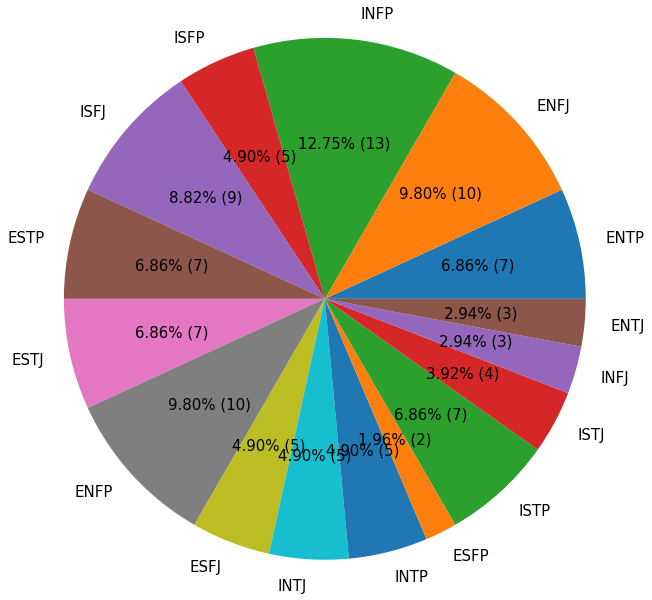

In [218]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}% ({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.pie(ssafy_mbti.values(), labels=ssafy_mbti.keys(), autopct=make_autopct(ssafy_mbti.values()),radius=3)
plt.rcParams.update({'font.size': 15})
plt.show()

In [118]:
def available_sohwan(sohwan_name):
    api_key = 'RGAPI-e46e0823-d634-4337-b492-f131cff74c71'
    api_url = "https://kr.api.riotgames.com/lol/summoner/v4/summoners/by-name/" + sohwan_name +'?api_key=' + api_key
    
    try:
        r = requests.get(api_url)
        if r.status_code == 200: # response가 정상이면 바로 맨 밑으로 이동하여 정상적으로 코드 실행
            pass

        elif r.status_code == 429:
            print('api cost full : infinite loop start')
            start_time = time.time()

            while True: # 429error가 끝날 때까지 무한 루프
                if r.status_code == 429:

                    print('try 10 second wait time')
                    time.sleep(10)

                    r = requests.get(api_url)
                    print(r.status_code)

                elif r.status_code == 200: #다시 response 200이면 loop escape
                    print('total wait time : ', time.time() - start_time)
                    print('recovery api cost')
                    break

        elif r.status_code == 503: # 잠시 서비스를 이용하지 못하는 에러
            print('service available error')
            start_time = time.time()

            while True:
                if r.status_code == 503 or r.status_code == 429:

                    print('try 10 second wait time')
                    time.sleep(10)

                    r = requests.get(api_url)
                    print(r.status_code)

                elif r.status_code == 200: # 똑같이 response가 정상이면 loop escape
                    print('total error wait time : ', time.time() - start_time)
                    print('recovery api cost')
                    break
        return r.status_code
    except:
        return

In [77]:
available_sohwan('임권호 분당거주')

200

In [123]:
ssafy_df['소환사 이름(ex: hide on bush)'].apply(available_sohwan)

api cost full : infinite loop start
try 10 second wait time
429
try 10 second wait time
429
try 10 second wait time
429
try 10 second wait time
429
try 10 second wait time
429
try 10 second wait time
429
try 10 second wait time
429
try 10 second wait time
429
try 10 second wait time
429
try 10 second wait time
200
total wait time :  102.16465139389038
recovery api cost


타임스탬프
2020-09-08 15:47:11.738    200
2020-09-08 15:48:33.951    200
2020-09-08 15:52:27.324    200
2020-09-08 15:52:53.363    200
2020-09-08 15:54:44.833    200
                          ... 
2020-09-09 09:14:17.233    200
2020-09-09 09:51:46.640    200
2020-09-09 11:54:14.280    200
2020-09-09 14:48:59.519    200
2020-09-10 22:20:37.708    404
Name: 소환사 이름(ex: hide on bush), Length: 102, dtype: int64

In [127]:
ssafy_df['소환사가능여부']=ssafy_df['소환사 이름(ex: hide on bush)'].apply(available_sohwan)

api cost full : infinite loop start
try 10 second wait time
429
try 10 second wait time
429
try 10 second wait time
429
try 10 second wait time
429
try 10 second wait time
429
try 10 second wait time
200
total wait time :  61.17216205596924
recovery api cost


In [129]:
ssafy_df[ssafy_df['소환사가능여부']!=200]

,소환사 이름(ex: hide on bush),MBTI,추첨 시 기프티콘을 발송해드리기 위한 휴대폰 번호를 기재해주시기 바랍니다.,추가로 해주었으면 하거나 재미있는 아이디어가 있으면 알려주세요,소환사가능여부
타임스탬프,,,,,
2020-09-08 17:38:57.149,서울 3반 서영우,ISTP,010-****-****,주제가 매우 좋은거 같습니다!,404
2020-09-08 17:45:40.411,용봉동불주먹,INFJ,010-****-****,"성격별 템트리, 성격별 신고횟수, 성격별 라인",404
2020-09-08 17:47:52.684,오오오오오오미,ENTP,010-****-****,ㄱ프티콘 주데여 ㅠㅠㅠ,404
2020-09-08 17:47:56.816,표하민,ENTJ,010-****-****,.,404


In [130]:
ssafy_df[ssafy_df['소환사가능여부']==200]

,소환사 이름(ex: hide on bush),MBTI,추첨 시 기프티콘을 발송해드리기 위한 휴대폰 번호를 기재해주시기 바랍니다.,추가로 해주었으면 하거나 재미있는 아이디어가 있으면 알려주세요,소환사가능여부
타임스탬프,,,,,
2020-09-08 15:47:11.738,임건호 분당거주,ENTP,010-****-****,저는 남자의 라인 탑라이너입니다.,200
2020-09-08 15:48:33.951,너왜맨날그래,ENFJ,010-****-****,없습니다,200
2020-09-08 15:52:27.324,실버가는게기적,INFP,010-****-****,부권남 엉덩이에 몽고반점,200
2020-09-08 15:52:53.363,michinshibar,ISFP,010-****-****,NaN,200
2020-09-08 15:54:44.833,logbug,INFP,010-****-****,롤을 플레이할때 들으면 도움되는 음악플레이리스트같은것도 하면 좋을거같아요우,200
...,...,...,...,...,...
2020-09-09 09:14:17.233,아웅따웅,ISTJ,010-****-****,자신과 상극인 유저 혹은 잘맞는 유저 유형,200
2020-09-09 09:51:46.640,정동게이바,INTJ,010-****-****,NaN,200
2020-09-09 11:54:14.280,꿍꿍꿍꿍꿍,ESFJ,010-****-****,100번째,200


In [162]:
def get_sohwan(sohwan_name):
    try:
        api_key = 'RGAPI-e46e0823-d634-4337-b492-f131cff74c71'
        api_url = "https://kr.api.riotgames.com/lol/summoner/v4/summoners/by-name/" + sohwan_name +'?api_key=' + api_key
        r = requests.get(api_url)
        if r.status_code == 200: # response가 정상이면 바로 맨 밑으로 이동하여 정상적으로 코드 실행
            pass

        elif r.status_code == 429:
            print('api cost full : infinite loop start')
            start_time = time.time()

            while True: # 429error가 끝날 때까지 무한 루프
                if r.status_code == 429:

                    print('try 10 second wait time')
                    time.sleep(10)

                    r = requests.get(api_url)
                    print(r.status_code)

                elif r.status_code == 200: #다시 response 200이면 loop escape
                    print('total wait time : ', time.time() - start_time)
                    print('recovery api cost')
                    break

        elif r.status_code == 503: # 잠시 서비스를 이용하지 못하는 에러
            print('service available error')
            start_time = time.time()

            while True:
                if r.status_code == 503 or r.status_code == 429:

                    print('try 10 second wait time')
                    time.sleep(10)

                    r = requests.get(api_url)
                    print(r.status_code)

                elif r.status_code == 200: # 똑같이 response가 정상이면 loop escape
                    print('total error wait time : ', time.time() - start_time)
                    print('recovery api cost')
                    break
        return r.json()
    except:
        return

In [221]:
def get_tier(sohwan_name):
    
    try:
        sohwan_id = get_sohwan(sohwan_name)['id']
        api_key = 'RGAPI-e46e0823-d634-4337-b492-f131cff74c71'
        api_url = "https://kr.api.riotgames.com/lol/league/v4/entries/by-summoner/" + sohwan_id +'?api_key=' + api_key
        r = requests.get(api_url)
        if r.status_code == 200: # response가 정상이면 바로 맨 밑으로 이동하여 정상적으로 코드 실행
            pass

        elif r.status_code == 429:
            print('api cost full : infinite loop start')
            start_time = time.time()

            while True: # 429error가 끝날 때까지 무한 루프
                if r.status_code == 429:

                    print('try 10 second wait time')
                    time.sleep(10)

                    r = requests.get(api_url)
                    print(r.status_code)

                elif r.status_code == 200: #다시 response 200이면 loop escape
                    print('total wait time : ', time.time() - start_time)
                    print('recovery api cost')
                    break

        elif r.status_code == 503: # 잠시 서비스를 이용하지 못하는 에러
            print('service available error')
            start_time = time.time()

            while True:
                if r.status_code == 503 or r.status_code == 429:

                    print('try 10 second wait time')
                    time.sleep(10)

                    r = requests.get(api_url)
                    print(r.status_code)

                elif r.status_code == 200: # 똑같이 response가 정상이면 loop escape
                    print('total error wait time : ', time.time() - start_time)
                    print('recovery api cost')
                    break
        return r.json()[-1]['tier']
    except:
        return

In [160]:
get_sohwan('hide on bush')

{'id': 'GhTnDczs_IOfKYRUzewMYENDmMUl-juHcFKm_-_DmrI6Xw',
 'accountId': 'K59HVC2gAaHAV6XA9KgRHeMNGLuBtc4IcfETyFv7WQcY',
 'puuid': '_l5tKa1wQti3rtCkY3TMebtMNB1OmjpwCMtYdX9AgCp3jxyIlRNt-aOgWA_O-3cwTWe5RQtOH47ASQ',
 'name': 'Hide on bush',
 'profileIconId': 6,
 'revisionDate': 1599564500000,
 'summonerLevel': 347}

In [148]:
get_tier('hide on bush')

('GRANDMASTER', 'I')

In [222]:
ssafy_df['tier']=ssafy_df['소환사 이름(ex: hide on bush)'].apply(get_tier)

api cost full : infinite loop start
try 10 second wait time
429
try 10 second wait time
429
try 10 second wait time
429
try 10 second wait time
429
try 10 second wait time
429
try 10 second wait time
200
total wait time :  61.24022197723389
recovery api cost
api cost full : infinite loop start
try 10 second wait time
429
try 10 second wait time
429
try 10 second wait time
429
try 10 second wait time
429
try 10 second wait time
429
try 10 second wait time
429
try 10 second wait time
429
try 10 second wait time
429
try 10 second wait time
429
try 10 second wait time
200
total wait time :  102.01798367500305
recovery api cost


In [169]:
def get_rank(sohwan_name):
    
    try:
        sohwan_id = get_sohwan(sohwan_name)['id']
        api_key = 'RGAPI-e46e0823-d634-4337-b492-f131cff74c71'
        api_url = "https://kr.api.riotgames.com/lol/league/v4/entries/by-summoner/" + sohwan_id +'?api_key=' + api_key
        r = requests.get(api_url)
        if r.status_code == 200: # response가 정상이면 바로 맨 밑으로 이동하여 정상적으로 코드 실행
            pass

        elif r.status_code == 429:
            print('api cost full : infinite loop start')
            start_time = time.time()

            while True: # 429error가 끝날 때까지 무한 루프
                if r.status_code == 429:

                    print('try 10 second wait time')
                    time.sleep(10)

                    r = requests.get(api_url)
                    print(r.status_code)

                elif r.status_code == 200: #다시 response 200이면 loop escape
                    print('total wait time : ', time.time() - start_time)
                    print('recovery api cost')
                    break

        elif r.status_code == 503: # 잠시 서비스를 이용하지 못하는 에러
            print('service available error')
            start_time = time.time()

            while True:
                if r.status_code == 503 or r.status_code == 429:

                    print('try 10 second wait time')
                    time.sleep(10)

                    r = requests.get(api_url)
                    print(r.status_code)

                elif r.status_code == 200: # 똑같이 response가 정상이면 loop escape
                    print('total error wait time : ', time.time() - start_time)
                    print('recovery api cost')
                    break
        return r.json()[0]['rank']
    except:
        return

In [223]:
ssafy_df['rank']=ssafy_df['소환사 이름(ex: hide on bush)'].apply(get_rank)

api cost full : infinite loop start
try 10 second wait time
429
try 10 second wait time
429
try 10 second wait time
429
try 10 second wait time
429
try 10 second wait time
429
try 10 second wait time
429
try 10 second wait time
429
try 10 second wait time
429
try 10 second wait time
429
try 10 second wait time
200
total wait time :  101.96601438522339
recovery api cost
api cost full : infinite loop start
try 10 second wait time
429
try 10 second wait time
429
try 10 second wait time
429
try 10 second wait time
429
try 10 second wait time
429
try 10 second wait time
429
try 10 second wait time
429
try 10 second wait time
429
try 10 second wait time
429
try 10 second wait time
200
total wait time :  101.90759658813477
recovery api cost


In [171]:
ssafy_df

,소환사 이름(ex: hide on bush),MBTI,추첨 시 기프티콘을 발송해드리기 위한 휴대폰 번호를 기재해주시기 바랍니다.,추가로 해주었으면 하거나 재미있는 아이디어가 있으면 알려주세요,소환사가능여부,tier,rank
타임스탬프,,,,,,,
2020-09-08 15:47:11.738,임건호 분당거주,ENTP,010-****-****,저는 남자의 라인 탑라이너입니다.,200,SILVER,II
2020-09-08 15:48:33.951,너왜맨날그래,ENFJ,010-****-****,없습니다,200,None,None
2020-09-08 15:52:27.324,실버가는게기적,INFP,010-****-****,부권남 엉덩이에 몽고반점,200,BRONZE,II
2020-09-08 15:52:53.363,michinshibar,ISFP,010-****-****,NaN,200,SILVER,III
2020-09-08 15:54:44.833,logbug,INFP,010-****-****,롤을 플레이할때 들으면 도움되는 음악플레이리스트같은것도 하면 좋을거같아요우,200,None,None
...,...,...,...,...,...,...,...
2020-09-09 09:14:17.233,아웅따웅,ISTJ,010-****-****,자신과 상극인 유저 혹은 잘맞는 유저 유형,200,None,None
2020-09-09 09:51:46.640,정동게이바,INTJ,010-****-****,NaN,200,None,None
2020-09-09 11:54:14.280,꿍꿍꿍꿍꿍,ESFJ,010-****-****,100번째,200,SILVER,III


In [224]:
ssafy_df['랭크'] = ssafy_df['tier'] + " " + ssafy_df['rank']

In [199]:
def tier_to_val(tier):
    if tier == "CHALLENGER" :
        return 10,
    elif tier == "GRANDMASTER" :
        return 20
    elif tier == "MASTER" :
        return 30
    elif tier == "DIAMOND" :
        return 40
    elif tier == "PLATINUM" :
        return 50
    elif tier == "GOLD" :
        return 60
    elif tier == "SILVER" :
        return 70
    elif tier == "BRONZE" :
        return 80
    elif tier == "IRON" :
        return 90
    else:
        return 100
def rank_to_val(rank):
    if rank == "I" :
        return 1
    elif rank == "II" :
        return 2
    elif rank == "III" :
        return 3
    elif rank == "IV" :
        return 4
    else:
        return 0


In [182]:
tier_to_val("None","None")

100

In [225]:
ssafy_df['ssafy_tier_val'] = ssafy_df['tier'].apply(tier_to_val)+ssafy_df['rank'].apply(rank_to_val)

In [226]:
ssafy_tier = Counter(ssafy_df.sort_values(by=['ssafy_tier_val'])['랭크'])

In [227]:
ssafy_df.sort_values(by=['ssafy_tier_val'])

,소환사 이름(ex: hide on bush),MBTI,추첨 시 기프티콘을 발송해드리기 위한 휴대폰 번호를 기재해주시기 바랍니다.,추가로 해주었으면 하거나 재미있는 아이디어가 있으면 알려주세요,소환사가능여부,tier,rank,랭크,ssafy_tier_val
타임스탬프,,,,,,,,,
2020-09-08 17:54:14.821,hide on bush,INFJ,010-****-****,주세요 ㅠㅠ,200,GRANDMASTER,I,GRANDMASTER I,21
2020-09-08 16:15:20.675,핵한심,ENFP,010-****-****,NaN,200,MASTER,I,MASTER I,31
2020-09-08 20:09:52.171,SWEA,ISTJ,010-****-****,NaN,200,DIAMOND,I,DIAMOND I,41
2020-09-08 18:00:09.743,dop,ISFJ,010-****-****,mbti 검사 시켜주세요,200,DIAMOND,III,DIAMOND III,43
2020-09-08 17:54:21.285,덮밥은나의힘,ISFJ,010-****-****,저는 무조건 강력하고 일대다가 가능한 챔피언들을 주로 하는데 모스트 1이 잔나에요 ...,200,DIAMOND,III,DIAMOND III,43
...,...,...,...,...,...,...,...,...,...
2020-09-08 18:02:22.710,유상욱,ENFJ,010-****-****,롤비티아이 궁금하네요 한번 해보고싶어요!!,200,None,None,NaN,100
2020-09-08 17:46:35.021,AgentH,ISFP,010-****-****,NaN,200,None,None,NaN,100
2020-09-08 18:08:37.816,4762012del,ISFJ,010-****-****,NaN,200,None,None,NaN,100


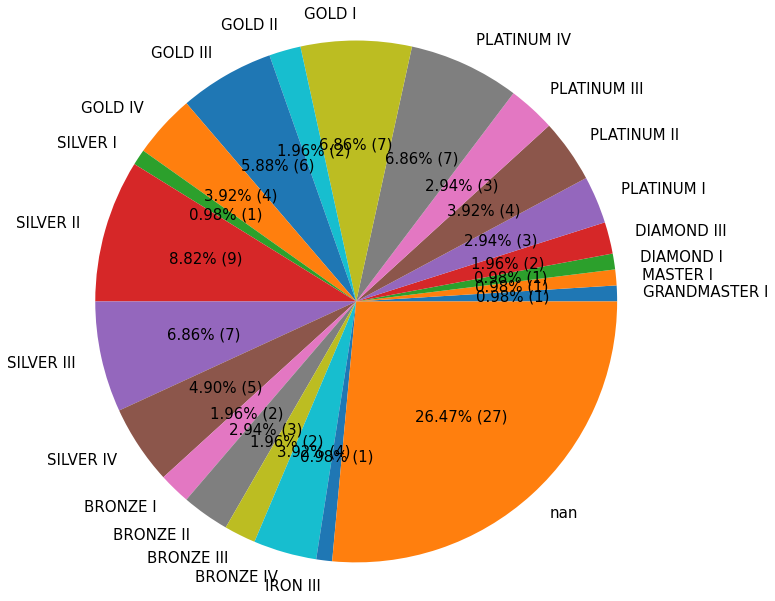

In [228]:
plt.pie(ssafy_tier.values(), labels=ssafy_tier.keys(), autopct=make_autopct(ssafy_tier.values()),radius=3)
plt.rcParams.update({'font.size': 15})
plt.show()